<a href="https://colab.research.google.com/github/mamuncseru/deep_understanding_deep_learning/blob/main/CodeChallenge_more_qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraies
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats('svg')

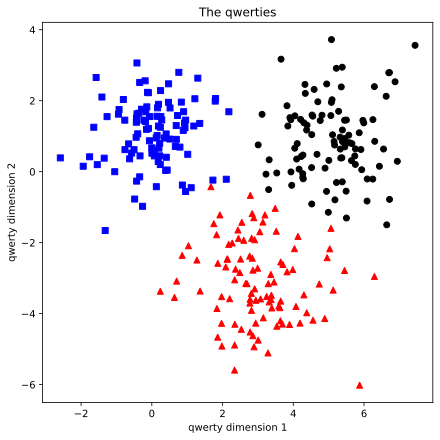

In [47]:
# create data 
nPerClust = 100
blur = 1

A = [0, 1]
B = [5, 1]
C = [3, -3]

# generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), np.ones((nPerClust, 1))+1))
# concatenate into a matrix
data_np = np.hstack((a, b, c)).T
# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(7,7))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'r^')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [54]:

ANNclassify = nn.Sequential(
  nn.Linear(2, 64),
  nn.ReLU(),
  nn.Linear(64, 64),
  nn.ReLU(),
  nn.Linear(64, 3),
  nn.Softmax(dim=1)
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)



In [55]:
print(data.shape)
yHat = ANNclassify(data)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


# Train the model

In [56]:
# a fixed parameter
numepochs = 1000


# initial losses
losses = torch.zeros(numepochs)
ongoingAcc = []


for epochi in range(numepochs):
  # forward pass
  yHat = ANNclassify(data)
  
  # compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss
  
  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  # compute accuracy
  matches = torch.argmax(yHat, axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPct)


# final forward pass
predictions = ANNclassify(data)

predlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())



Final accuracy: 98.3333%


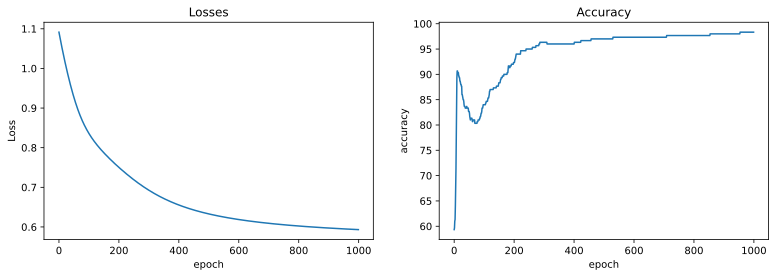

In [57]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()